In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
test_data = pd.read_csv("test.csv")

In [4]:
train_data.head()

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,1,6.01,131,29,11,335,127,Bad,33,12,Yes,Yes
1,2,6.50,148,51,16,148,150,Medium,58,17,No,Yes
2,3,7.70,118,71,12,44,89,Medium,67,18,No,Yes
3,4,7.78,86,54,0,497,64,Bad,33,12,Yes,No
4,5,11.82,113,66,16,322,74,Good,76,15,Yes,Yes


In [5]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,349.0,175.000000,100.891856,1.0,88.00,175.00,262.00,349.00
totalSales,349.0,7.475989,2.823039,0.0,5.42,7.45,9.32,16.27
CompetitorPrice,349.0,124.389685,15.528524,77.0,115.00,124.00,134.00,175.00
Income,349.0,68.461318,27.963992,21.0,43.00,68.00,92.00,120.00
Advertising,349.0,6.813754,6.552374,0.0,0.00,5.00,12.00,29.00
Population,349.0,264.340974,150.472555,10.0,126.00,276.00,400.00,509.00
Price,349.0,114.851003,23.374773,24.0,99.00,116.00,130.00,191.00
Age,349.0,53.406877,16.018867,25.0,40.00,55.00,65.00,80.00
Education,349.0,13.859599,2.624005,10.0,11.00,14.00,16.00,18.00


In [6]:
type(train_data["totalSales"])

pandas.core.series.Series

In [7]:
class_sales = []

for sale in train_data["totalSales"]:
    if sale <= 5:
        class_sales.append(1)
    elif sale > 5 and sale <= 10:
        class_sales.append(2)
    else:
        class_sales.append(3)
        
print(pd.Series(class_sales))

0      2
1      2
2      2
3      2
4      3
      ..
344    2
345    2
346    3
347    2
348    2
Length: 349, dtype: int64


In [8]:
train_data["Class"] = class_sales

In [9]:
train_data.head()

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US,Class
0,1,6.01,131,29,11,335,127,Bad,33,12,Yes,Yes,2
1,2,6.50,148,51,16,148,150,Medium,58,17,No,Yes,2
2,3,7.70,118,71,12,44,89,Medium,67,18,No,Yes,2
3,4,7.78,86,54,0,497,64,Bad,33,12,Yes,No,2
4,5,11.82,113,66,16,322,74,Good,76,15,Yes,Yes,3


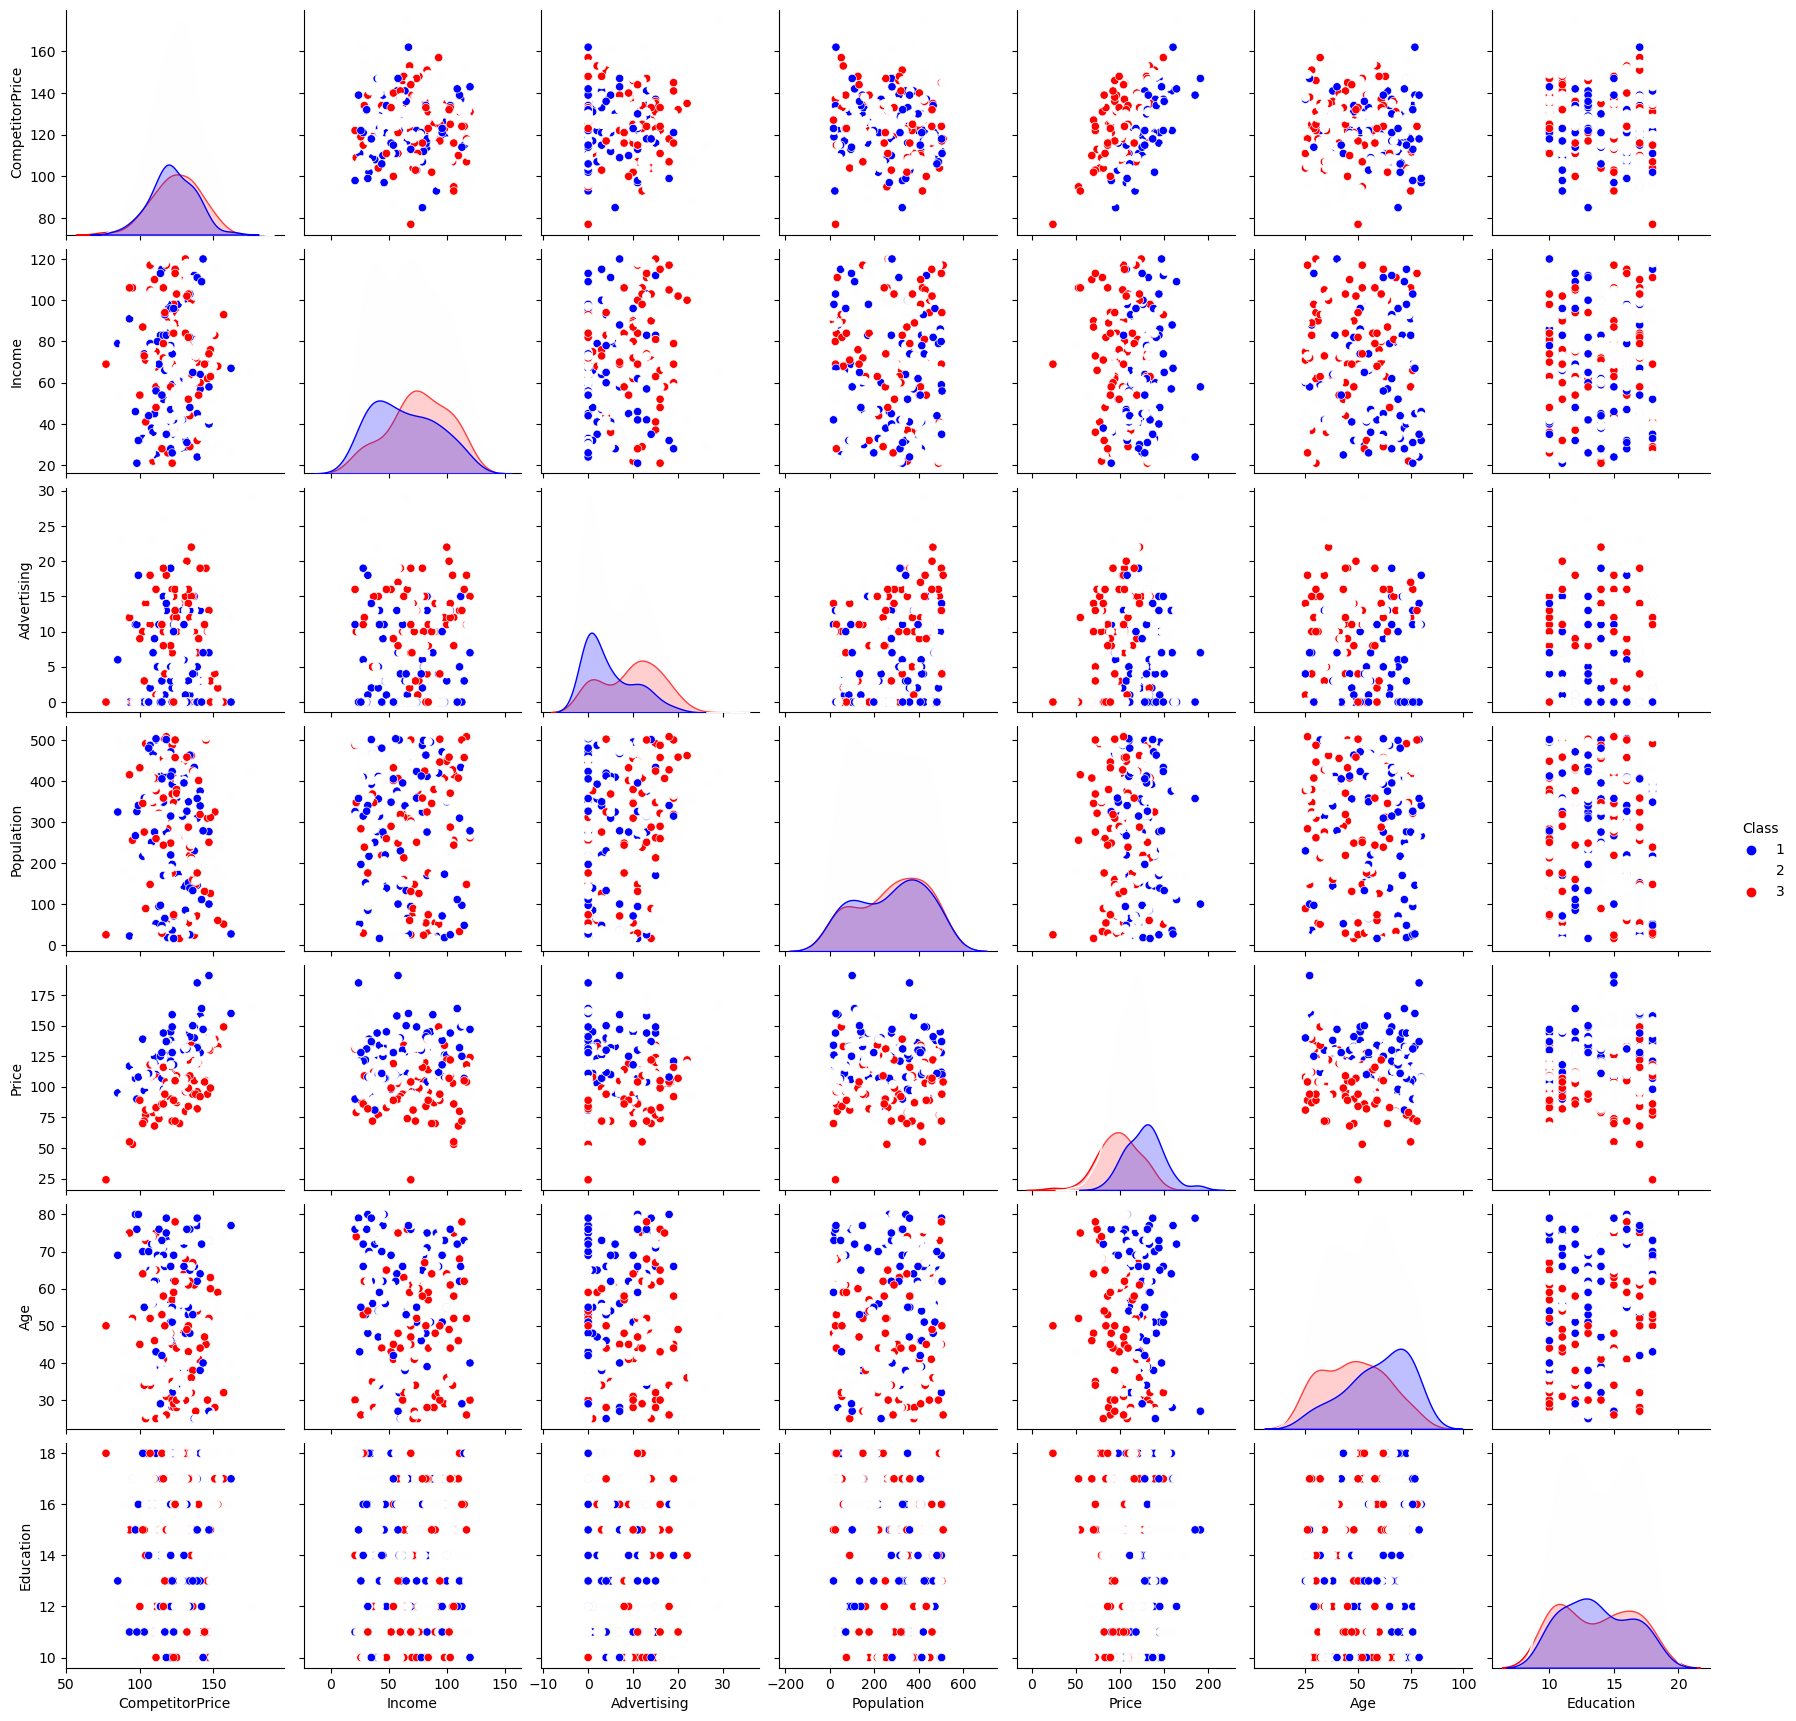

In [13]:
sns.pairplot(train_data.drop(["ID", "totalSales"], axis = 1), hue = "Class", palette = "bwr")

<AxesSubplot:>

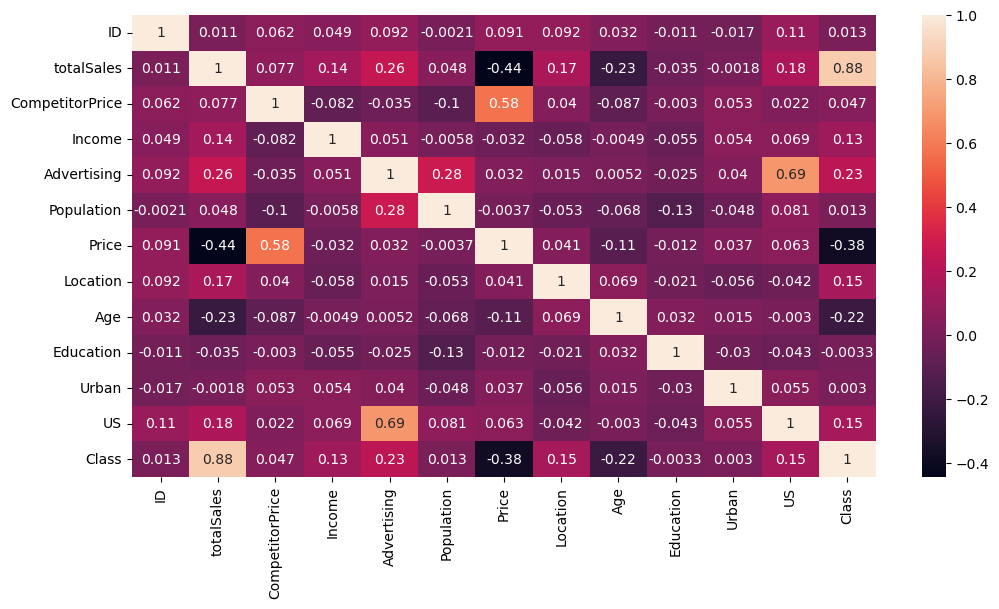

In [52]:
cor = train_data.corr()

plt.figure(figsize = (12, 6))
sns.heatmap(cor, annot = True)

Doing Label Encoding for train data and test data

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()

In [12]:
# Label Encoding the values of Location, Urban and US for train data
train_data["Location"] = label_encoder.fit_transform(train_data["Location"])
train_data["Urban"] = label_encoder.fit_transform(train_data["Urban"])
train_data["US"] = label_encoder.fit_transform(train_data["US"])

In [13]:
train_data["Location"].unique()

array([0, 2, 1])

In [14]:
train_data["Urban"].unique()

array([1, 0])

In [15]:
train_data["US"].unique()

array([1, 0])

In [16]:
train_data.head()

,ID,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US,Class
0,1,6.01,131,29,11,335,127,0,33,12,1,1,2
1,2,6.50,148,51,16,148,150,2,58,17,0,1,2
2,3,7.70,118,71,12,44,89,2,67,18,0,1,2
3,4,7.78,86,54,0,497,64,0,33,12,1,0,2
4,5,11.82,113,66,16,322,74,1,76,15,1,1,3


In [17]:
# Label Encoding the values of Location, Urban and US for test data
test_data["Location"] = label_encoder.fit_transform(test_data["Location"])
test_data["Urban"] = label_encoder.fit_transform(test_data["Urban"])
test_data["US"] = label_encoder.fit_transform(test_data["US"])

In [18]:
test_data["Location"].unique()

array([1, 2, 0])

In [19]:
test_data["Urban"].unique()

array([1, 0])

In [20]:
test_data["US"].unique()

array([1, 0])

Training the model using train, test split

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
    X = train_data.drop(["ID", "Class"],axis = 1)
    y = train_data["Class"]

In [24]:
X

,totalSales,CompetitorPrice,Income,Advertising,Population,Price,Location,Age,Education,Urban,US
0,6.01,131,29,11,335,127,0,33,12,1,1
1,6.50,148,51,16,148,150,2,58,17,0,1
2,7.70,118,71,12,44,89,2,67,18,0,1
3,7.78,86,54,0,497,64,0,33,12,1,0
4,11.82,113,66,16,322,74,1,76,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...
344,9.70,138,61,12,156,120,2,25,14,1,1
345,5.35,130,58,19,366,139,0,33,16,1,1
346,11.70,144,69,11,131,104,2,47,11,1,1
347,8.73,129,76,16,58,121,2,69,12,1,1


In [25]:
y

0      2
1      2
2      2
3      2
4      3
      ..
344    2
345    2
346    3
347    2
348    2
Name: Class, Length: 349, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression(max_iter=1e8)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=100000000.0)

In [30]:
predictions = logmodel.predict(X_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      0.85      0.92        26
           2       0.91      1.00      0.95        72
           3       1.00      0.83      0.91        18

    accuracy                           0.94       116
   macro avg       0.97      0.89      0.93       116
weighted avg       0.95      0.94      0.94       116



In [33]:
from sklearn.metrics import accuracy_score

In [34]:
print(accuracy_score(y_test, predictions) * 100) 

93.96551724137932


Predictions on the test data

In [38]:
preds = logmodel.predict(test_data.drop("ID", axis = 1))

In [43]:
preds

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 1, 3, 1, 2, 3, 3, 3, 1,
       3, 2, 3, 1, 1, 1, 1, 2, 3, 2, 1, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2,
       2, 1, 1, 3, 2, 2, 2], dtype=int64)

In [48]:
df = pd.DataFrame({"Category":preds})
ID = test_data["ID"]

In [49]:
result = pd.concat([ID,df], axis=1, join='inner')
display(result)

,ID,Category
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2
5,6,2
6,7,2
7,8,2
8,9,2
9,10,2


In [50]:
result.to_csv('results.csv', index=False)